## Introduction

This notebook just lists past DM-searching dual-phase TPCs, so that you can plot a few properties. 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=22)
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rc('text', usetex=True)
import pandas as pd

In [2]:
tpcs = []

In [3]:
xe10 = dict(
    label = 'XENON10',
    field = 730,
    length = 15,
    voltage = 11., # kV from 730 * 15
    designvoltage = 15, # this is a guess from https://arxiv.org/pdf/1001.2834.pdf, since the 
                        # field optimization was done at 1 kV/cm, see also
                        # (Master thesis Roman Gomez):
                        # https://scholarship.rice.edu/bitstream/handle/1911/20507/1441821.PDF?sequence=1&isAllowed=y
                        # and certainly less than 20 kV from cable limitation, see Sorensen thesis.
    radius = 10.,
    mass = 14,
    year = 2008
    )

xe100 = dict( 
    # https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.109.181301
    # https://ac.els-cdn.com/S0927650512000059/1-s2.0-S0927650512000059-main.pdf?_tid=f0a2deea-9b93-4d29-979e-29b8f1d4a6de&acdnat=1535714895_caffd9032452aef88684c9b0c0740c47
    label = 'XENON100',
    field = 530,
    length = 30.5,
    voltage = 16.1,
    designvoltage = 30, # https://arxiv.org/pdf/1107.2155.pdf not achieved due to light pulses
    radius = 15.3,
    mass = 62,
    year = 2010
    )

lux = dict(
    label = 'LUX',
    field = 181,
    length = 48,
    voltage = 181 * 48 * 0.001,
    designvoltage = 100, # https://arxiv.org/pdf/1211.3788.pdf
    radius = 47/2,
    mass = 250,
    year = 2014
    )

pandax2 = dict(
    label = 'PandaX-II',
    field = 393.5,
    length = 60,
    voltage = 29,
    # Panda-XI electrical breakdown at 36 kV https://arxiv.org/pdf/1405.2882.pdf
    # micro-discharge at 20 kV across 15 cm,so set at 15 kV
    
    radius = 64.6/2,
    mass = 580,
    year = 2016
    )

xe1t = dict( 
    # https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.119.181301
    # 
    label = 'XENON1T',
    field = 117,
    length = 97,
    voltage = 117 * 97 * 0.001,
    designvoltage = 100, # due to charge
    radius = 96/2,
    mass = 2004,
    year = 2017
    )

tpcs = pd.DataFrame([xe10, xe100, lux, pandax2, xe1t])
tpcs['designfield'] = tpcs['designvoltage'] * 1000. / tpcs['length']

In [4]:
designs = [
    dict(
    # label = 'XENONnT',
    label = 'XENONnT, LZ',
    mass = 5900# 7800 # 5.9 ton, actually
    ),
    dict(
    # label = 'LZ',
    label = '', # Suppress label
    mass = 7000, # LZ mass according to TDR
    voltage = 100, # kV design 50 kV nominal
    ),
    dict(
    label = 'DARWIN',
    mass = 40e3,
    voltage = 100,# or above, according to the paper
    field = 500 # V/cm approximately
    )    
]

## Functions

In [5]:
def field(mass, V, rho=3.0):
    '''
    Compute the field, assuming a constant voltage and a cylinder with radius equal to diameter.
    Enter mass in kg and V in kV
    Get field in V/cm
    '''
    # Enter mass in kg
    # assuming R = 0.5l, we get V = 2 pi R^3
    # so R = (V / 2 pi)
    vol = mass * 1000 / rho # in cm3
    R = (vol / (2 * np.pi))**(1/3)
    l = 2 * R
    # print(l)
    return V / l * 1e3

In [6]:
import matplotlib as mpl
def draw_box(x, y, **kwargs):
    """Draw rectangle, given x-y boundary tuples"""
    # Arcane syntax of the week: matplotlib's Rectangle...
    plt.gca().add_patch(mpl.patches.Rectangle(
        (x[0], y[0]), x[1] - x[0], y[1] - y[0], **kwargs))

## Plots

### Field versus mass

In [192]:
xplot = np.logspace(1, 5, 100)

#### Linear version

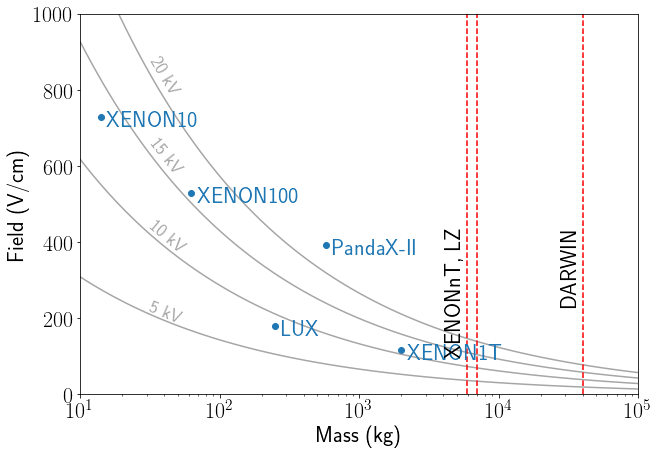

In [193]:
import math
plt.scatter(tpcs['mass'], tpcs['field'])
for x, y, t in zip(tpcs['mass'],tpcs['field'],tpcs['label']):
    plt.text(x * 1.1, y- 25, t, color='C0')

plt.xscale('log')
plotv = [5, 10, 15, 20]
for v in plotv:
    plt.plot(xplot, field(xplot, v), color='gray', alpha = 0.7)
    xfix = 30
    i = np.argmin(np.abs(xplot)- xfix)
    dx = np.log10(xplot[i + 1]) - np.log10(xplot[i])
    dy = field(xplot[i + 1], v) - field(xplot[i], v)
    ax  = plt.gca()
    aspect = 15.5 / 10.5
    ahf = 1.5
    dxpix = dx / 4. * aspect * ahf
    dypix = dy / 1000
    angle = math.atan(dypix/dxpix) * 180 / np.pi
    plt.text(xfix, field(xfix, v) + 5, '%d kV' % v, color='gray', rotation = angle, fontdict=dict(size=18), alpha = 0.7)
    
for t in designs:
    plt.axvline(t['mass'], color='red', ls='--')
    plt.text(t['mass'] * 0.7, 400, t['label'], rotation = 90)
    
plt.xlim(10, 100e3)
plt.ylim(0, 1000)
plt.xlabel('Mass (kg)')
plt.ylabel('Field (V/cm)')

#### Log-log version

In [194]:
from copy import deepcopy

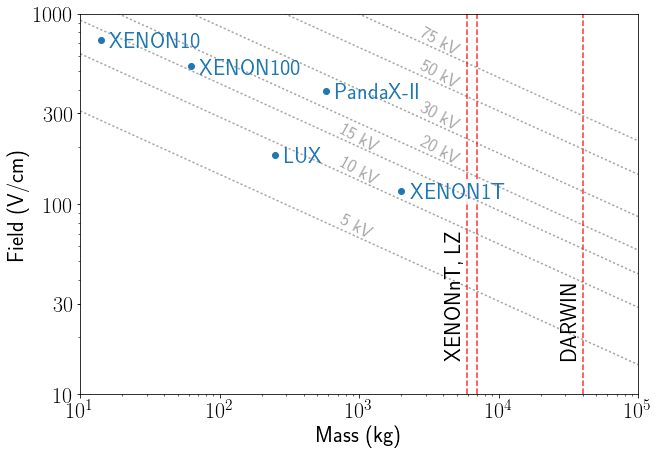

In [195]:
# Plot dots for the TPCs
plt.scatter(tpcs['mass'], tpcs['field'])
# Label them
for x, y, t in zip(tpcs['mass'],tpcs['field'],tpcs['label']):
    textbox = plt.text(x * 1.15, y * 0.915, t, color='C0')
    # textbox.set_bbox(dict(facecolor='white', alpha = 0.7, edgecolor='None'))

plt.xscale('log')
plotv = [5, 10, 15, 20, 30, 50, 75]
for v in plotv:
    plt.plot(xplot, field(xplot, v), color='gray', alpha = 0.7, ls='dotted')
    if v < 20:
        xfix = 700
    else:
        xfix = 2600
    angle = -29
    plt.text(xfix, field(xfix, v) * 1.05, '%d kV' % v, color='gray', rotation = angle, 
             fontdict=dict(size=18), alpha = 0.7)
    
lstyle = dict(color='red', ls='--', alpha = 0.8)
lstyleoverlap = deepcopy(lstyle)
lstyleoverlap['alpha'] = 0.1

for t in designs:
    if t['mass'] < 1e4:
        plt.plot([t['mass'], t['mass']], [10, 100], **lstyle)
        plt.plot([t['mass'], t['mass']], [100, 135], **lstyleoverlap)
        plt.plot([t['mass'], t['mass']], [135, 1000], **lstyle)
        
    else:
        plt.axvline(t['mass'], **lstyle)
    plt.text(t['mass'] * 0.7, 15, t['label'], rotation = 90, va='bottom')
    
plt.xlim(10, 100e3)
# plt.ylim(0, 1000)
plt.yscale('log')
plt.ylim(10, 1e3)
plt.yticks([10, 30, 100, 300, 1000], ['$%d$' % l for l in [10, 30, 100, 300, 1000]])

plt.xlabel('Mass (kg)')
plt.ylabel('Field (V/cm)')
plt.savefig('plots/tpcfields.pdf', bbox_inches='tight')

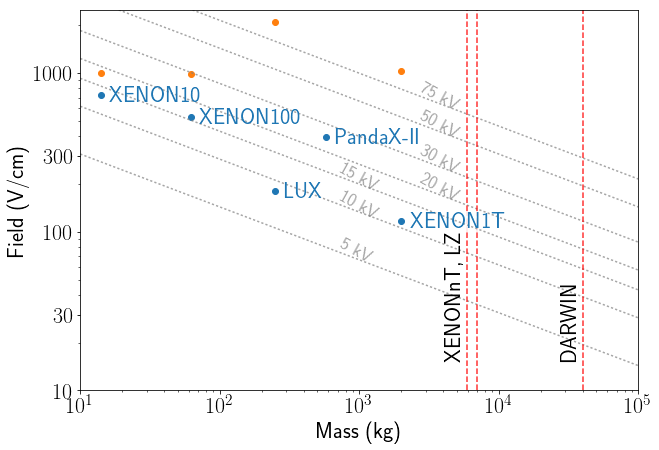

In [197]:
# Plot dots for the TPCs
plt.scatter(tpcs['mass'], tpcs['field'])
plt.scatter(tpcs['mass'], tpcs['designfield'])
# Label them
for x, y, t in zip(tpcs['mass'],tpcs['field'],tpcs['label']):
    textbox = plt.text(x * 1.15, y * 0.915, t, color='C0')
    # textbox.set_bbox(dict(facecolor='white', alpha = 0.7, edgecolor='None'))

plt.xscale('log')
plotv = [5, 10, 15, 20, 30, 50, 75]
for v in plotv:
    plt.plot(xplot, field(xplot, v), color='gray', alpha = 0.7, ls='dotted')
    if v < 20:
        xfix = 700
    else:
        xfix = 2600
    angle = -29
    plt.text(xfix, field(xfix, v) * 1.05, '%d kV' % v, color='gray', rotation = angle, 
             fontdict=dict(size=18), alpha = 0.7)
    
lstyle = dict(color='red', ls='--', alpha = 0.8)
lstyleoverlap = deepcopy(lstyle)
lstyleoverlap['alpha'] = 0.1

for t in designs:
    if t['mass'] < 1e4:
        plt.plot([t['mass'], t['mass']], [10, 100], **lstyle)
        plt.plot([t['mass'], t['mass']], [100, 135], **lstyleoverlap)
        plt.plot([t['mass'], t['mass']], [135, 2.5e3], **lstyle)
        
    else:
        plt.axvline(t['mass'], **lstyle)
    plt.text(t['mass'] * 0.7, 15, t['label'], rotation = 90, va='bottom')
    
plt.xlim(10, 100e3)
# plt.ylim(0, 1000)
plt.yscale('log')
plt.ylim(10, 2.5e3)
plt.yticks([10, 30, 100, 300, 1000], ['$%d$' % l for l in [10, 30, 100, 300, 1000]])

plt.xlabel('Mass (kg)')
plt.ylabel('Field (V/cm)')
# plt.savefig('plots/tpcfields.pdf', bbox_inches='tight')

### Mass vs year

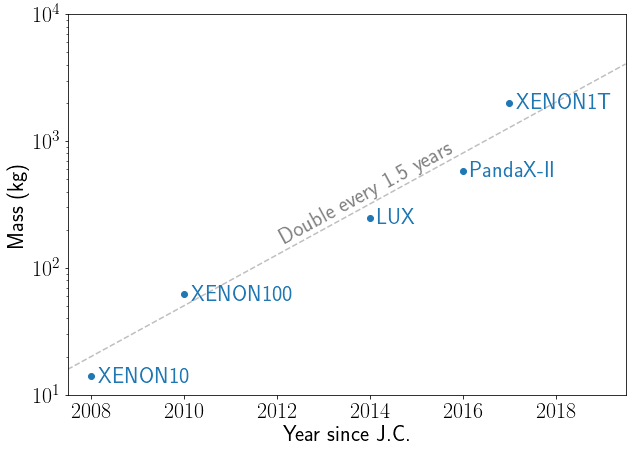

In [13]:
plt.scatter(tpcs['year'], tpcs['mass'])
plt.yscale('log')
for x, y, t in zip(tpcs['year'],tpcs['mass'],tpcs['label']):
    textbox = plt.text(x+0.15, y * 0.9, t, color='C0')

    
xplot = np.linspace(2007.5, 2019.5)
plt.plot(xplot, 20 * 2**((xplot - 2008) / 1.5), color='gray', alpha = 0.5, ls='--')
plt.text(2012, 800, 'Double every 1.5 years', color='gray', rotation = 28.5)
plt.xlim(2007.5, 2019.5)
plt.ylim(10, 1e4)
plt.xlabel('Year since J.C.')
plt.ylabel('Mass (kg)')

## Limits

Instead of the TPC, let's focus on the limits.

Here's an overview of the live fraction of a few past experments, using the final science run where possible.

In [7]:
# Live fraction of Xe1T in SR1
livefraction1 = 246.7 / (365 + 6)
# LUX WS2014-16
livefraction2 = 332/600
# Xe100 225 live days
livefraction3 = 225 / (13*30)
# PandaX-II run 10 (approximate)
livefraction4 = 77 / (4 * 30)

In [8]:
[livefraction1, livefraction2, livefraction3, livefraction4]

[0.6649595687331536,
 0.5533333333333333,
 0.5769230769230769,
 0.6416666666666667]

For large-scale, next-phase experiments, after years of running, we'll be more clever (right?) so we may reach a live fraction of 70 %?

In [9]:
livefraction = 0.7

In [10]:
limits = [
    dict(
        exp = 'CDMS',
        mass = 60,
        sigma = 1.6e-43,
        year = 2006,
        month = 1,
        doi = '10.1103/PhysRevLett.96.011302',
        # Combined, Germanium
    ),   
    dict(
        exp = 'CDMS',
        mass = 60,
        sigma = 4e-43,
        year = 2004,
        month = 11,
        doi = '10.1103/PhysRevLett.93.211301',
        # First results
    ),   
    dict(
        exp = 'SuperCDMS',
        mass = 8,
        sigma = 1.2e-42,
        year = 2014,
        month = 6,
        doi = '10.1103/PhysRevLett.112.241302',
        # Low-masss search
    ),   
    dict(
        exp = 'ZEPLIN-I',
        mass = 50,
        sigma = 1.1e-6 * 1e-12 * 1e-24,
        year = 2005,
        month = 6,
        doi = '10.1016/j.astropartphys.2005.02.004',
        # Single phase, first results
    ),
    dict(
        exp = 'ZEPLIN-II',
        mass = 65,
        sigma = 6.6e-7 * 1e-12 * 1e-24,
        year = 2007,
        month = 11,
        doi = '10.1016/j.astropartphys.2007.06.002',
        # Also two-phase, first results
    ),   
    dict(
        exp = 'ZEPLIN-III',
        mass = 60,
        sigma = 8.1e-8 * 1e-12 * 1e-24, # picobarn... nice
        year = 2009,
        month = 9,
        doi = '10.1103/PhysRevD.80.052010',
        # xenon tpc, First science run
    ),   
    dict(
        exp = 'ZEPLIN-III',
        mass = 50,
        sigma = 4.8e-8 * 1e-12 * 1e-24,
        year = 2012,
        month = 3,
        doi = '10.1016/j.physletb.2012.01.064',
        # Second science run
    ),   
    dict(
        exp = 'XENON10',
        mass = 30,
        sigma = 8.8e-44,
        year = 2008,
        month = 1,
        doi = '10.1103/PhysRevLett.100.021303',
        # First (only?) results
    ),  
    dict(
        exp = 'XENON100',
        mass = 55,
        sigma = 3.4e-44,
        year = 2010,
        month = 9,
        doi = '10.1103/PhysRevLett.105.131302',
        # First results
    ),   
    dict(
        exp = 'XENON100',
        mass = 50,
        sigma = 7.0e-45,
        year = 2011,
        month = 9,
        doi = '10.1103/PhysRevLett.107.131302',
        # 100 live days
    ),
    dict(
        exp = 'XENON100',
        mass = 55,
        sigma = 2e-45,
        year = 2012,
        month = 11,
        doi = '10.1103/PhysRevLett.109.181301',
        # 225 live days
    ),
    dict(
        exp = 'XENON1T',
        mass = 30,
        sigma = 4.1e-47,
        year = 2018,
        month = 9,
        doi = '10.1103/PhysRevLett.121.111302',
        # 1 TY
    ),   
    dict(
        exp = 'XENON1T',
        mass = 35,
        sigma = 7.7e-47,
        year = 2017,
        month = 10,
        doi = '10.1103/PhysRevLett.119.181301',
        # First results
    ),   
    dict(
        exp = 'XENONnT',
        mass = 50,
        sigma = 1.6e-48,
        year = 2020 + 20 / (4 * livefraction), # 20 ty, 4 t fiducial (TDR)
        month = 0,
        doi = '10.1088/1475-7516/2016/04/027', # Xe1T physics reach
    ),   
    dict(
        exp = 'LUX',
        mass = 33,
        sigma = 7.6e-46,
        year = 2014,
        month = 3,
        doi = '10.1103/PhysRevLett.112.091303',
        # first results
    ),
    dict(
        exp = 'LUX',
        mass = 33,
        sigma = 0.6e-45,
        year = 2016,
        month = 4,
        doi = '10.1103/PhysRevLett.116.161301',
        # Reanalysis
    ),
    dict(
        exp = 'LUX',
        mass = 50,
        sigma = 1.1e-46,
        year = 2017,
        month = 1,
        doi = '10.1103/PhysRevLett.118.021303',
        # Full exposure
    ),
    dict(
        exp = 'LZ',
        mass = 40,
        sigma = 1.6e-48,
        year = 2020.5 + 1000 / (livefraction * 365), # 1000 days
        month = 0,
        doi = 'https://arxiv.org/abs/1802.06039',
    ),   
    dict(
        exp = 'PandaX-II',
        mass = 40,
        sigma = 8.6e-47,
        year = 2017,
        month = 10,
        doi = '10.1103/PhysRevLett.119.181302',
        # 54 Td
    ),   
    dict(
        exp = 'PandaX-II',
        mass = 40,
        sigma = 2.5e-46,
        year = 2016,
        month = 9,
        doi = '10.1103/PhysRevLett.117.121303',
        # 98.7 days
    ),   
    dict(
        exp = 'PandaX-II',
        mass = 44.7,
        sigma = 2.97e-45,
        year = 2016,
        month = 6,
        doi = '10.1103/PhysRevD.93.122009',
    ),   
#     dict(
#         exp = 'edelweiss-I',
#         mass = 50,
#         sigma = 1e-45,
#         year = 2005,
#         month = 6,
#         doi = '10.1103/PhysRevD.71.122002',
#         # Final results
#     ),   
    dict(
        exp = 'XMASS-I',
        mass = 60,
        sigma = 2.2e-44,
        year = 2018,
        month = 4,
        doi = '1804.02180',
        # Single phase
    ),  
    dict(
        exp = 'DarkSide-50',
        mass = 100,
        sigma = 6.1e-44,
        year = 2015,
        month = 4,
        doi = '10.1016/j.physletb.2015.03.012',
        # Liquid argon TPC
    ),   

    dict(
        exp = 'DARWIN',#  200 ty',
        mass = 40,
        sigma = 2.5e-49,
        year = 2023 + (200/(30 * livefraction)), # 200 ton-year divided by 30 ton fiducial, live fraction 0.65
        month = 0,
        doi = '10.1088/1475-7516/2016/11/017',
    ),   
    dict(
        exp = 'DARWIN',# 500 ty',
        mass = 40,
        sigma = 1.5e-49,
        year = 2023 + (500/(30 * livefraction)), # 500 ton-year divided by 30 ton fiducial, live fraction 0.65
        month = 0,
        doi = '10.1088/1475-7516/2016/11/017',
    ),   

]

In [11]:
for lim in limits:
    lim['date'] = lim['year'] + lim['month'] / 12

In [12]:
for lim in limits:
    if lim['exp'] == 'CDMS': lim['style'] = dict(color='black', marker='x', s=75)
    if lim['exp'] == 'SuperCDMS': lim['style'] = dict(color='black', marker='x', s=75)
    if lim['exp'] == 'DarkSide-50': lim['style'] = dict(color='black', marker='s', s=75)
    if lim['exp'] == 'XENON10': lim['style'] = dict(color='lightskyblue')
    if lim['exp'] == 'XENON100': lim['style'] = dict(color='dodgerblue')
    if lim['exp'] == 'XENON1T': lim['style'] = dict(color='blue')
    if lim['exp'] == 'XENONnT': lim['style'] = dict(edgecolors='blue', facecolors = 'none', marker='o', s=50, lw=2)
    if lim['exp'] == 'ZEPLIN-II': lim['style'] = dict(color='lightgreen')
    if lim['exp'] == 'ZEPLIN-III': lim['style'] = dict(color='green')
    if lim['exp'] == 'LUX': lim['style'] = dict(color='purple')
    if lim['exp'] == 'LZ': lim['style'] = dict(edgecolors='purple', facecolors = 'none', marker='o', s=50, lw=2)
    if lim['exp'] == 'PandaX-II': lim['style'] = dict(color='red')
    if lim['exp'] == 'DARWIN' : lim['style'] = dict(edgecolors='black', facecolors = 'none', marker='o', s=50, lw=2)
    # if lim['exp'] == '': lim['style'] = dict(color='')
    # if lim['exp'] == '': lim['style'] = dict(color='')
    # if lim['exp'] == '': lim['style'] = dict(color='')


### No future version

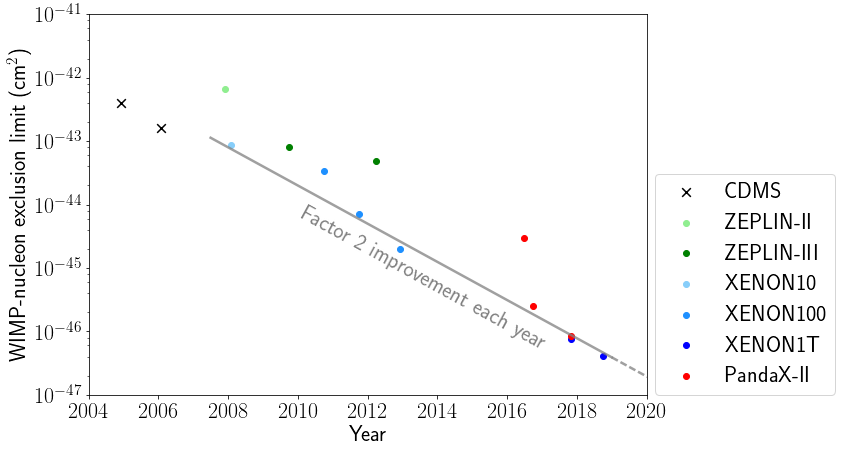

In [13]:
# one phase, low-mass and future
to_skip = ['ZEPLIN-I', 'XMASS-I', 'SuperCDMS', 'DarkSide-50', 'DARWIN', 'LUX', 'XENONnT', 'LZ'] 

for lim in limits:
    if lim['exp'] in to_skip:
        continue
    if lim['exp'] not in plt.gca().get_legend_handles_labels()[1]:
        lim['style']['label'] = lim['exp']
    plt.scatter(lim['date'], lim['sigma'], **lim['style'])
    # plt.text(lim['date'], lim['sigma'], lim['exp'])

xplot1 = np.linspace(2007.5, 2019)
doublingtime = 1
yplot1 = 1.6e-43 * (0.5)**((xplot1 - 2007) / doublingtime)
plt.plot(xplot1, yplot1, color='gray', lw=2.5, alpha=0.75)

xplot0 = np.linspace(2019, 2035)
yplot0 = 1.6e-43 * (0.5)**((xplot0 - 2007) / doublingtime)
plt.plot(xplot0, yplot0, color='gray', ls='--', lw=2.5, alpha=0.75)

plt.text(2010, 0.6e-44, 'Factor 2 improvement each year', color='gray', rotation = -28.7)

plt.legend(loc=(1.015,0))
plt.yscale('log')
plt.ylim(1e-47, 1e-41)
plt.xlim(2004, 2020)
plt.xlabel('Year')
plt.ylabel('WIMP-nucleon exclusion limit (cm$^2$)')
# plt.savefig('plots/limit_v_time.pdf', bbox_inches='tight')

### With future experiments

In [14]:
# Curve traced from 10.1103/PhysRevD.89.023524, figure 12 left, at 50 GeV
nfloor = np.array([-48.352096414408464, -48.8359447290152, -49.356309897554524, -49.84015821216127])

In [15]:
nfloor = 10**nfloor

In [16]:
nfloor_n = [1, 3, 10, 30]

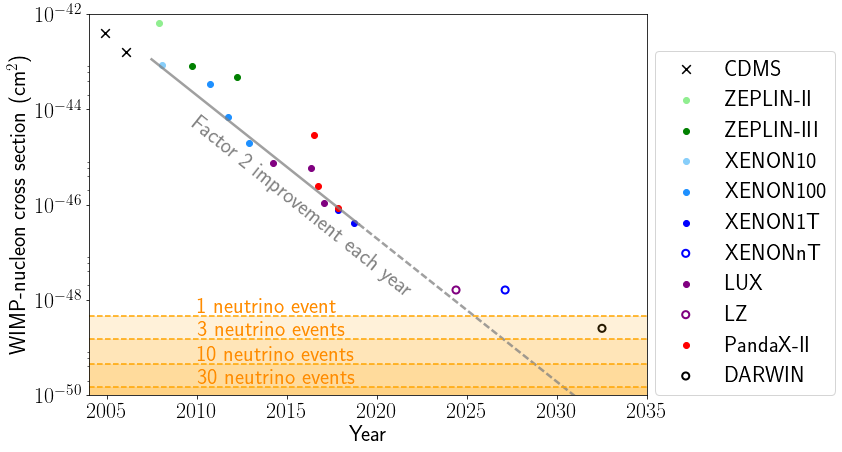

In [21]:
to_skip = ['ZEPLIN-I', 'XMASS-I', 'SuperCDMS', 'DarkSide-50'] # Single-phase and low-mass 
for lim in limits:
    if lim['exp'] in to_skip:
        continue
    if lim['exp'] not in plt.gca().get_legend_handles_labels()[1]:
        lim['style']['label'] = lim['exp']
    plt.scatter(lim['date'], lim['sigma'], **lim['style'])
    # plt.text(lim['date'], lim['sigma'], lim['exp'])

xplot1 = np.linspace(2007.5, 2019)
doublingtime = 1
yplot1 = 1.6e-43 * (0.5)**((xplot1 - 2007) / doublingtime)
plt.plot(xplot1, yplot1, color='gray', lw=2.5, alpha=0.75)

xplot0 = np.linspace(2019, 2035)
yplot0 = 1.6e-43 * (0.5)**((xplot0 - 2007) / doublingtime)
plt.plot(xplot0, yplot0, color='gray', ls='--', lw=2.5, alpha=0.75)

plt.text(2009.5, 4e-45, 'Factor 2 improvement each year', color='gray', rotation = -38.6)

for n, N in zip(nfloor, nfloor_n):
    plt.axhline(n, color='orange', ls='--')
    draw_box((2004, 2035), (1e-50, n), color='orange', alpha = 0.15)
    if N == 1:
        plt.text(2010, n * 1.2, '%d neutrino event' % N, color='darkorange')
    else:
        plt.text(2010, n * 1.2, '%d neutrino events' % N, color='darkorange')

plt.legend(loc=(1.015,0))
plt.yscale('log')
plt.ylim(1e-50, 1e-42)
plt.xlim(2004, 2035)
plt.xlabel('Year')
plt.ylabel('WIMP-nucleon cross section (cm$^2$)')
plt.savefig('plots/limit_v_time.pdf', bbox_inches='tight')

In [22]:
pd.DataFrame(limits)

,date,doi,exp,mass,month,sigma,style,year
0,2006.083333,10.1103/PhysRevLett.96.011302,CDMS,60.0,1,1.600000e-43,"{'marker': 'x', 'color': 'black', 's': 75, 'la...",2006.000000
1,2004.916667,10.1103/PhysRevLett.93.211301,CDMS,60.0,11,4.000000e-43,"{'marker': 'x', 'color': 'black', 's': 75}",2004.000000
2,2014.500000,10.1103/PhysRevLett.112.241302,SuperCDMS,8.0,6,1.200000e-42,"{'marker': 'x', 'color': 'black', 's': 75}",2014.000000
3,2005.500000,10.1016/j.astropartphys.2005.02.004,ZEPLIN-I,50.0,6,1.100000e-42,NaN,2005.000000
4,2007.916667,10.1016/j.astropartphys.2007.06.002,ZEPLIN-II,65.0,11,6.600000e-43,"{'color': 'lightgreen', 'label': 'ZEPLIN-II'}",2007.000000
5,2009.750000,10.1103/PhysRevD.80.052010,ZEPLIN-III,60.0,9,8.100000e-44,"{'color': 'green', 'label': 'ZEPLIN-III'}",2009.000000
6,2012.250000,10.1016/j.physletb.2012.01.064,ZEPLIN-III,50.0,3,4.800000e-44,{'color': 'green'},2012.000000
7,2008.083333,10.1103/PhysRevLett.100.021303,XENON10,30.0,1,8.800000e-44,"{'color': 'lightskyblue', 'label': 'XENON10'}",2008.000000
8,2010.750000,10.1103/PhysRevLett.105.131302,XENON100,55.0,9,3.400000e-44,"{'color': 'dodgerblue', 'label': 'XENON100'}",2010.000000
9,2011.750000,10.1103/PhysRevLett.107.131302,XENON100,50.0,9,7.000000e-45,{'color': 'dodgerblue'},2011.000000
